# Home assignment Milestone 1 -- BRAIN2SPEECH

During the project we would like to syntetise speech from brain signal.

For this we use the Intractranial EEG datasets that can be found here: https://osf.io/nrgx6/

We created a data_prepare.py file, that contains 1-3 helper functions for data prepare.

The main tasks was:
- Download the raw data and extract from the NWB format and create NumPy arrays from it.
- Filter the silence periods from the signal to get more balanced dataset for deep learning.
- Generate train, validation and test datasets from the data.

We used the research of NeuralinterfacingLab as the starting point of our project, the research lab used LineaRegression for syntetise speech from the brain signal and we will use deep learning for the same exercise. During the projects we used some scripts created by NeuralinterfacingLab.

In [1]:
# Import data_prepare modul that contains functions that we created.
from data_prepare import *
import zipfile
import os

# Download data and scripts

We downloaded the raw data and extract it from the scripts that was created by NeuralinterfacingLab.

In [2]:
# Download the data and extract it
download_file("https://files.de-1.osf.io/v1/resources/nrgx6/providers/osfstorage/623d9d9a938b480e3797af8f", "data.zip")
zipfile.ZipFile("data.zip", 'r').extractall("")

In [4]:
#Remove unnecessary files
os.remove("data.zip")
shutil.rmtree("SingleWordProductionDutch-iBIDS") ## Ezek maradhatnak szerintem, ha mashogy akarnank elofeldolgozni a fajlokat

# Prepare data for learning

During the data preparation at first we filter the silenced parts of the datasets to get a more balanced datasets that better for deep learning. After that we splited the dataset to 3 part(Train, Validation and Test). After that we standardize the datasets and we created a dimensional reduction using PCA.

In [3]:
# Run script to take various steps to extract the useful features of the downloaded data
execfile("scripts/extract_features.py")

scripts/extract_features.py:131: DeprecationWarning: scipy.hanning is deprecated and will be removed in SciPy 2.0.0, use numpy.hanning instead
  win = scipy.hanning(np.floor(windowLength*sr + 1))[:-1]
scripts/extract_features.py:131: DeprecationWarning: scipy.hanning is deprecated and will be removed in SciPy 2.0.0, use numpy.hanning instead
  win = scipy.hanning(np.floor(windowLength*sr + 1))[:-1]
scripts/extract_features.py:131: DeprecationWarning: scipy.hanning is deprecated and will be removed in SciPy 2.0.0, use numpy.hanning instead
  win = scipy.hanning(np.floor(windowLength*sr + 1))[:-1]
scripts/extract_features.py:131: DeprecationWarning: scipy.hanning is deprecated and will be removed in SciPy 2.0.0, use numpy.hanning instead
  win = scipy.hanning(np.floor(windowLength*sr + 1))[:-1]
scripts/extract_features.py:131: DeprecationWarning: scipy.hanning is deprecated and will be removed in SciPy 2.0.0, use numpy.hanning instead
  win = scipy.hanning(np.floor(windowLength*sr + 1))[

In [ ]:
# Reconstructing sound using linear regression
# The implemented Griffin-Lim algorith is also tested on the original sound file
execfile('scripts/reconstruction_minimal.py')

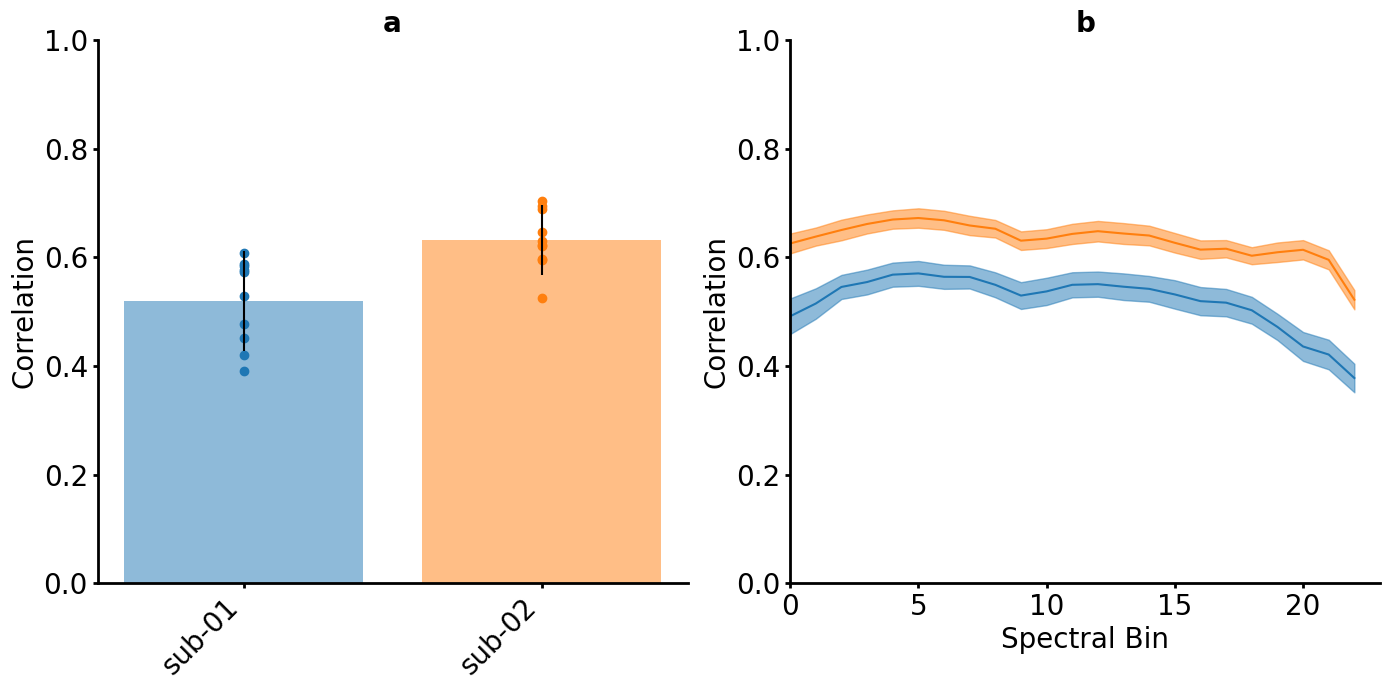

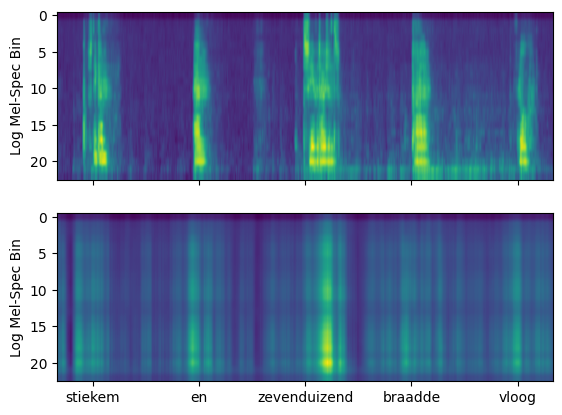

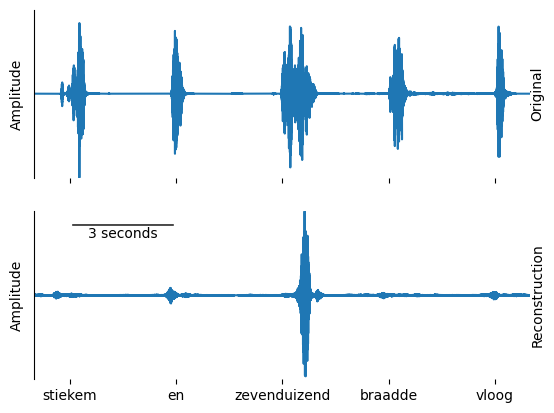

In [3]:
# Visualizing the data, and the reconstructed results
execfile('scripts/viz_results.py')

In [5]:
# Get lists of samples
pts = ['sub-%02d'%i for i in range(1,11)]
# New list for the prepared datasets
prepared_data = []

In [6]:
# Prepare data from all sample for deep learning
# In addition to the previous data preparation steps, we also filtering out the silence 
for pt in pts:
    #Prepare data for learning
    (X_train, Y_train, X_val, Y_val, X_test, Y_test) = generate_datasets(pts[0])
    prepared_data.append((X_train, Y_train, X_val, Y_val, X_test, Y_test))